<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
# Check number of duplicate rows
df.duplicated().sum()


np.int64(0)

In [7]:
# Remove duplicate rows
df = df.drop_duplicates()
df.shape


(65437, 114)

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [8]:
# Count missing values in CodingActivities
df['CodingActivities'].isnull().sum()


np.int64(10971)

##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [11]:
# Forward-fill missing CodingActivities values
df['CodingActivities'] = df['CodingActivities'].ffill()

In [12]:
# Verify no missing values remain
df['CodingActivities'].isnull().sum()

np.int64(0)

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [13]:
# Identify compensation-related columns
[col for col in df.columns if 'Comp' in col or 'Salary' in col]


['CompTotal', 'AIComplex', 'ConvertedCompYearly']

In [14]:
# Main compensation column used for normalization
df['ConvertedCompYearly'].head()


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: ConvertedCompYearly, dtype: float64

##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [15]:
# Min-Max normalize ConvertedCompYearly
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()

df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)

df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head()



,ConvertedCompYearly,ConvertedCompYearly_MinMax
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [16]:
# Check normalized values where salary exists
df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].dropna().head()


,ConvertedCompYearly,ConvertedCompYearly_MinMax
72,7322.0,0.000450
374,30074.0,0.001850
379,91295.0,0.005616
385,53703.0,0.003303
389,110000.0,0.006766


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [17]:
## Z-score normalize ConvertedCompYearly
mean_val = df['ConvertedCompYearly'].mean()
std_val = df['ConvertedCompYearly'].std()

df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_val) / std_val

df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].dropna().head()


,ConvertedCompYearly,ConvertedCompYearly_Zscore
72,7322.0,-0.422117
374,30074.0,-0.300290
379,91295.0,0.027521
385,53703.0,-0.173767
389,110000.0,0.127678


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


In [20]:
import numpy as np

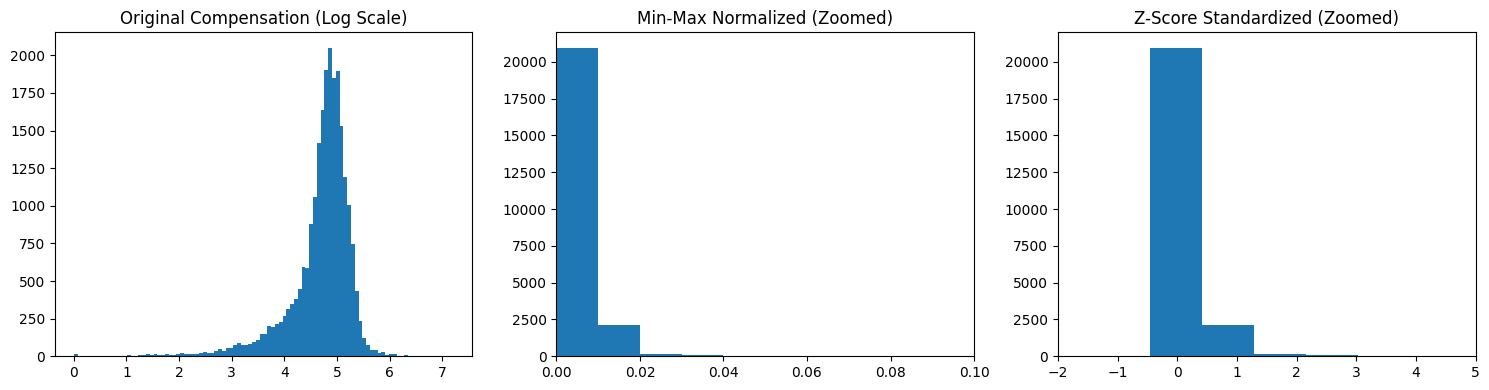

In [22]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(np.log10(df['ConvertedCompYearly'].dropna()), bins=100)
plt.title('Original Compensation (Log Scale)')

plt.subplot(1,3,2)
plt.hist(df['ConvertedCompYearly_MinMax'].dropna(), bins=100)
plt.xlim(0, 0.1)   # zoom into where most values live
plt.title('Min-Max Normalized (Zoomed)')

plt.subplot(1,3,3)
plt.hist(df['ConvertedCompYearly_Zscore'].dropna(), bins=100)
plt.xlim(-2, 5)    # typical salary range in z-scores
plt.title('Z-Score Standardized (Zoomed)')

plt.tight_layout()
plt.show()

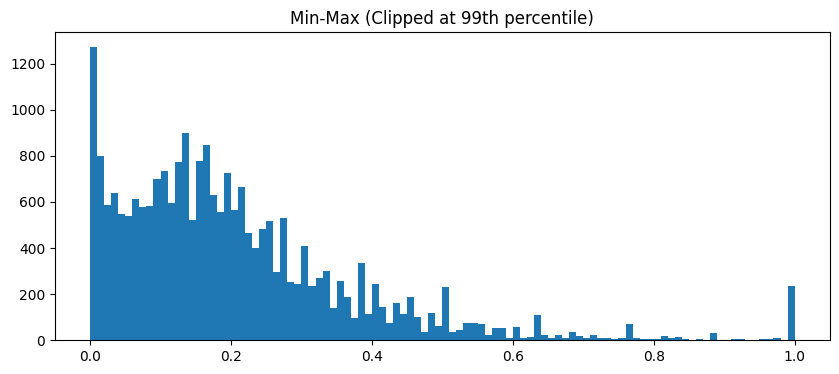

In [23]:
salary = df['ConvertedCompYearly']
cap = salary.quantile(0.99)  # cap top 1%

salary_clipped = salary.clip(upper=cap)

# Min-Max on clipped values
min_c = salary_clipped.min()
max_c = salary_clipped.max()
df['ConvertedCompYearly_MinMax_Clipped'] = (salary_clipped - min_c) / (max_c - min_c)

# Z-score on clipped values
mean_c = salary_clipped.mean()
std_c = salary_clipped.std()
df['ConvertedCompYearly_Zscore_Clipped'] = (salary_clipped - mean_c) / std_c

# Plot
plt.figure(figsize=(10,4))
plt.hist(df['ConvertedCompYearly_MinMax_Clipped'].dropna(), bins=100)
plt.title('Min-Max (Clipped at 99th percentile)')
plt.show()


In [ ]:
# Applying a logarithmic scale makes the overall distribution more readable.
# Min-Max and Z-score normalization preserve the skew because they scale based on the original values.
# Clipping the top 1% of salaries before normalization produces a clearer distribution of typical compensation ranges.


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
